# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Task #2- To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [60]:
# Importing all libraries required.  
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Reading data from remote link
url = "http://bit.ly/w-data"
table = pd.read_csv(url)
print("Data imported successfully")

table.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualizing the data

The data points are plotted on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.The plot is created with the following script:

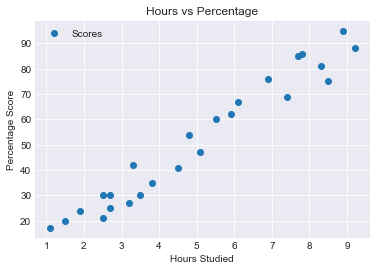

In [62]:
# Plotting the distribution of scores
from scipy import stats
s_data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

plt.show()

 #### **From the above graph we can observe that there is positive linear corelation between the number of hours studied and the percentage of score.**

## Preparing the data

In [63]:
 #The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

table.describe()    
    

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [64]:
table1 = table.corr()
table1.head()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [65]:
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

## Spliting the data into training and test sets

Now that we have our attributes and labels, the data is split into training and test sets. This is done using Scikit-Learn's built-in train_test_split() method:

In [66]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Training the algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [67]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Comparing the Trained and Tested set

<function matplotlib.pyplot.show(*args, **kw)>

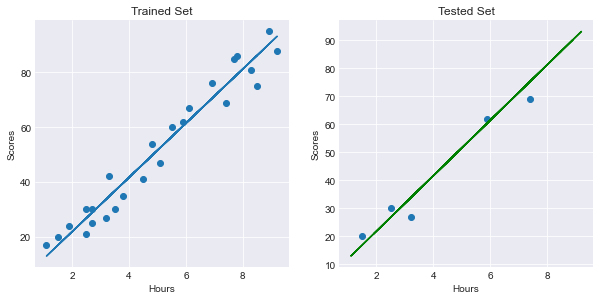

In [68]:

fig = plt.figure(figsize =(10,10))
mx1 = plt.subplot(221)
mx2 = plt.subplot(222)

line = regressor.coef_*x+regressor.intercept_

mx1.scatter(x,y)
mx1.plot(x,line)
plt.show
mx1.set_title('Trained Set')
mx1.set_xlabel('Hours')
mx1.set_ylabel('Scores')

mx2.scatter(x_test, y_test)
mx2.plot(x_train, regressor.predict(x_train), c="g")
mx2.set_title('Tested Set')
mx2.set_xlabel('Hours')
mx2.set_ylabel('Scores')
plt.show

## Making Predictions

Now that we have trained the algorithm , its time to make some predictions.


In [69]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now to predict the score for desired number of hrs

In [71]:
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the Model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here we have chosen the mean square error.

In [72]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
